In [1]:
import math
from numpy import linalg as LA
import numpy as np
from matplotlib import pyplot as plt 

import random
import os
from numba import njit, prange, cuda
import itertools
import sympy as sp

@njit()
def fit_J(w, res, expn, etal, sigma):
    for i in range(len(etal)):
        res += etal[i] / (expn[i] + sigma * 1.j * w)


@njit()
def fit_t(t, res, expn, etal):
    for i in range(len(etal)):
        res += etal[i] * np.exp(-expn[i] * t)
    return res



<ipython-input-2-48d7d113f836>:33: RuntimeWarning: overflow encountered in exp
  plt.scatter(w, 1/(1 + np.exp(sigma * beta * (w - mu_x))),s=4)
<ipython-input-2-48d7d113f836>:34: RuntimeWarning: overflow encountered in exp
  plt.plot(w, jw / (1 + np.exp(sigma * beta * (w - mu_x))), label='jw*fermi')


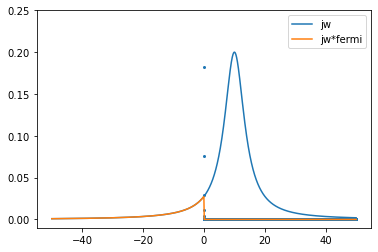

In [2]:
nmod = 4
lams1 = 0.2
lams2 = 0
gams1 = 4.0
gams2 = 0
omgs1 = 10
omgs2 = 0
temp = 0.01
beta = int(1 / temp)
mu_x = 0.0

#random_expn = 10 *  (np.random.rand(5))
#random_etal = np.abs(np.random.rand(5))

def gen_jw(w):
         return lams1 * gams1**2 / (((w - mu_x) - omgs1)**2 + gams1**2)
    #     jw = np.zeros_like(w)
    #index = (w <= gams1) & (w >= -gams1)
    
    #     jw = lams1 * np.exp(-np.abs(w) / gams1)
    #jw = 0 * w
    #for i in range(len(random_expn)):
    #    jw[index] += random_etal[i] / ((w[index] - random_expn[i])**2 + 0.01)
    #return jw

len_ = 10000
spe_wid = 50
w = np.linspace(-spe_wid, spe_wid, len_)

sigma = 1
jw = gen_jw(w)
plt.plot(w, jw, label='jw')
plt.scatter(w, 1/(1 + np.exp(sigma * beta * (w - mu_x))),s=4)
plt.plot(w, jw / (1 + np.exp(sigma * beta * (w - mu_x))), label='jw*fermi')
plt.ylim(-0.01,0.25)
plt.legend(loc=1)
# plt.xlim(-15, 15)

In [3]:
# 4 - np.random.rand(10)*2

5.0


<ipython-input-4-10dae44efc59>:14: RuntimeWarning: overflow encountered in exp
  cw2 = jw / (1 + np.exp(sigma * beta * (w - mu_x)))


100000.0


<ipython-input-4-10dae44efc59>:32: RuntimeWarning: overflow encountered in exp
  plt.plot(w, jw / (1 + np.exp(sigma * beta * (w - mu_x))), label='exact')
/home/ZDC/program/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


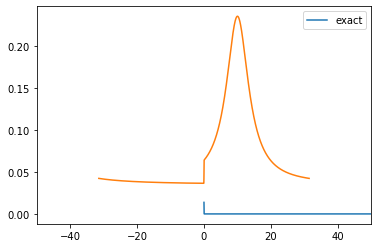

In [4]:
n = 2500
scale = 500
scale_fft = 100
n_fft = 10000000

n_rate = (scale_fft * scale/ (4 * n))
print(n_rate)
n_rate = int(n_rate)
w = np.linspace(0, scale_fft * np.pi, n_fft + 3)[:-1]
dw = w[1] - w[0]

jw = gen_jw(w)
cw1 = jw / (1 + np.exp(- sigma * beta * (w - mu_x)))
cw2 = jw / (1 + np.exp(sigma * beta * (w - mu_x)))
# del jw

cw1[0] = cw1[0] / 2
cw2[0] = cw2[0] / 2
if sigma == -1:
    fft_ct = (np.fft.ifft(cw1) * len(cw1) * dw + np.fft.fft(cw2) * dw) / np.pi
if sigma == 1:
    fft_ct = (np.fft.fft(cw1) * dw + np.fft.ifft(cw2) * len(cw2) * dw) / np.pi
fft_t = 2 * np.pi * np.fft.fftfreq(len(cw1), dw)
del cw1, cw2

print(max(fft_t))
fft_ct = fft_ct[(scale>=fft_t) & (fft_t >= 0)][::n_rate]
fft_t = fft_t[(scale>=fft_t) & (fft_t >= 0)][::n_rate]
t = fft_t
res_t = np.zeros(len(t), dtype=complex)

plt.plot(w, jw / (1 + np.exp(sigma * beta * (w - mu_x))), label='exact')

freq_tmp = 2 * np.pi * np.fft.fftfreq(len(fft_ct), fft_t[1]-fft_t[0])
value_tmp = len(fft_ct) * (fft_t[1]-fft_t[0]) * np.fft.ifft(fft_ct)

index_tmp = np.argsort(freq_tmp[:])
freq_tmp = freq_tmp[index_tmp][::]
value_tmp = value_tmp[index_tmp][::]

# fft_ct[0] = fft_ct[0] / 2
plt.plot(freq_tmp, value_tmp)


# fft_ct[0] = fft_ct[0] * 2
plt.legend(loc=1)
plt.xlim(-50, 50)
plt.show()

[8.12784930e-01 5.76843138e-01 1.64962497e-01 5.11013961e-02
 1.17664344e-02 4.61335475e-03 2.27547997e-03 4.13213108e-04
 7.24309050e-05 5.98276517e-05 1.15236757e-05 2.53589092e-06
 1.54858602e-06 1.17546971e-06 2.05006654e-07 2.85962787e-08
 7.62734240e-09 3.58110259e-09 1.46424115e-09 4.64224797e-10
 1.21624755e-10 2.75179920e-11 3.92786397e-12 3.26205641e-12
 8.80654379e-13 2.83139428e-13 8.07750994e-14 2.50052174e-14
 2.25889394e-15 5.39647357e-16 3.67093701e-16 2.98812128e-16
 2.00674530e-16 1.84822841e-16 1.82600519e-16 1.82580371e-16
 1.79317991e-16 1.75232703e-16 1.73836123e-16 1.71728834e-16
 1.71719056e-16 1.71366458e-16 1.69538579e-16 1.69013802e-16
 1.68044894e-16 1.66235402e-16 1.65125050e-16 1.63174447e-16
 1.61314982e-16 1.58996583e-16 1.58458475e-16 1.55970838e-16
 1.55581881e-16 1.54793654e-16 1.54446803e-16 1.53870797e-16
 1.53117119e-16 1.53007517e-16 1.52574415e-16 1.51898932e-16
 1.51417565e-16 1.51037336e-16 1.50447319e-16 1.50149492e-16
 1.49775369e-16 1.496502

/home/ZDC/program/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


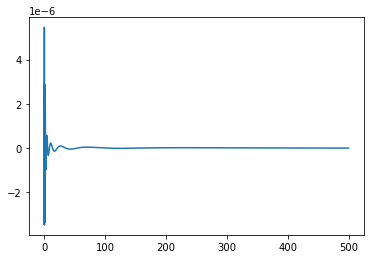

[9.37494775e-01 4.32326006e-01 3.26819327e-02 6.19480092e-03
 1.60945369e-03 5.02835271e-04 1.77957733e-04 6.79990305e-05
 2.65364496e-05 1.01102559e-05 3.70697969e-06 1.31258812e-06
 4.51713204e-07 1.51843202e-07 5.00308360e-08 1.61976537e-08
 5.16197658e-09 1.62152815e-09 5.02632161e-10 1.53879416e-10
 4.65628708e-11 1.39349373e-11 4.12682745e-12 1.20999910e-12
 3.51397515e-13 1.01118171e-13 2.88417773e-14 8.15328310e-15
 1.78669242e-15 1.02164659e-15 2.64352814e-16 2.19357846e-16
 2.12647368e-16 1.98460134e-16 1.85448122e-16 1.82840242e-16
 1.75906924e-16 1.69999540e-16 1.67812098e-16 1.66806429e-16
 1.65349446e-16 1.61792950e-16 1.60662000e-16 1.60467908e-16
 1.59957128e-16 1.59191552e-16 1.57190622e-16 1.56654146e-16
 1.56642461e-16 1.56333201e-16 1.54170058e-16 1.53983309e-16
 1.53160070e-16 1.50078958e-16 1.49959834e-16 1.49647841e-16
 1.48458090e-16 1.47497297e-16 1.47241770e-16 1.47011115e-16
 1.46987293e-16 1.46882890e-16 1.46293563e-16 1.44660079e-16
 1.44100253e-16 1.428698

In [ ]:
n_sample = n + 1
n_gamma_l = [10]
h = np.imag(fft_ct)
H = np.zeros((n_sample, n_sample))
for i in range(n_sample):
    H[i, :] = h[i:n_sample + i]
sing_vs, Q = LA.eigh(H)
# del H
phase_mat = np.diag(
    [np.exp(-1j * np.angle(sing_v) / 2.0) for sing_v in sing_vs])
vs = np.array([np.abs(sing_v) for sing_v in sing_vs])
Qp = np.dot(Q, phase_mat)
sort_array = np.argsort(vs)[::-1]
vs = vs[sort_array]
Qp = (Qp[:, sort_array])
print(vs[:100])
vs = vs[:20]
Qp = Qp[:, :20]

for n_gamma in n_gamma_l:
    print("len of gamma", n_gamma)
    gamma = np.roots(Qp[:, n_gamma][::-1])
    gamma_new = gamma[np.argsort(np.abs(gamma))[:n_gamma]]
    t_imag = 2 * n * np.log(gamma_new)
    gamma_m = np.zeros((n_sample * 2 - 1, n_gamma), dtype=complex)
    for i in range(n_gamma):
        for j in range(n_sample * 2 - 1):
            gamma_m[j, i] = gamma_new[i]**j
    omega_imag = np.dot(LA.inv(np.dot(np.transpose(gamma_m), gamma_m)),
                        np.dot(np.transpose(gamma_m), np.transpose(h)))

    res_t = np.zeros(len(t), dtype=complex)
    fit_t(fft_t, res_t, -t_imag / scale, omega_imag)
    plt.plot(fft_t, np.imag(fft_ct) - res_t)
    #plt.savefig("imag_{}.pdf".format(n_gamma))
    plt.show()

h = np.real(fft_ct)
H = np.zeros((n_sample, n_sample))
for i in range(n_sample):
    H[i, :] = h[i:n_sample + i]
sing_vs, Q = LA.eigh(H)
# del H
phase_mat = np.diag(
    [np.exp(-1j * np.angle(sing_v) / 2.0) for sing_v in sing_vs])
vs = np.array([np.abs(sing_v) for sing_v in sing_vs])
Qp = np.dot(Q, phase_mat)
sort_array = np.argsort(vs)[::-1]
vs = vs[sort_array]
Qp = (Qp[:, sort_array])
print(vs[:100])
vs = vs[:20]
Qp = Qp[:, :20]

for n_gamma in n_gamma_l:
    print("len of gamma", n_gamma)
    gamma = np.roots(Qp[:, n_gamma][::-1])
    gamma_new = gamma[np.argsort(np.abs(gamma))[:n_gamma]]
    t_real = 2 * n * np.log(gamma_new)
    gamma_m = np.zeros((n_sample * 2 - 1, n_gamma), dtype=complex)
    for i in range(n_gamma):
        for j in range(n_sample * 2 - 1):
            gamma_m[j, i] = gamma_new[i]**j
    omega_real = np.dot(LA.inv(np.dot(np.transpose(gamma_m), gamma_m)),
                        np.dot(np.transpose(gamma_m), np.transpose(h)))

    res_t = np.zeros(len(t), dtype=complex)
    fit_t(fft_t, res_t, -t_real / scale, omega_real)
    plt.plot(fft_t, np.real(fft_ct) - res_t)
    #plt.savefig("real_{}.pdf".format(n_gamma))
    plt.show()

In [ ]:
etal1 = np.append(1.j * omega_imag, omega_real)
etar1 = np.append(np.conjugate(1.j * omega_imag), np.conjugate(omega_real))
etaa1 = np.append(np.abs(omega_imag), np.abs(omega_real))
expn1 = np.append(-t_imag / scale, -t_real / scale)

print("diss_rate\n",expn1)
print("eta\n",etal1)

filter_ = 1e-4
#print(len(expn1[np.abs(etal1) <= filter_]))
expn1 = expn1[np.abs(etal1) > filter_]
etal1 = etal1[np.abs(etal1) > filter_]

# if sigma == 1:
#np.savetxt("expn1", expn1)
#np.savetxt("etal1", etal1)
# if sigma == -1:
#np.savetxt("expn2", expn1)
#np.savetxt("etal2", etal1)

len_ = 1000000
spe_wid = 20
w = np.linspace(-spe_wid, spe_wid, len_)
phixx = gen_jw(w) / (1 + np.exp(sigma * beta * (w - mu_x)))
res_J1 = np.zeros(len(w), dtype=complex)
fit_J(w, res_J1, expn1, etal1, sigma)

plt.plot(w, (phixx.real), "b", label="exact")
plt.plot(w, (res_J1.real), "r--", label="PFS")
plt.xlim(-2, 2)
#plt.ylim(-0.001, 0.01)
plt.legend(loc=1)
plt.show()